# Technical Interview

# Candidate Name: Muhammad Umair Nasir

## Table of Contents

* [Class: DataProcessor](#chapter1)
* [Class: Model](#chapter_2)
* [Execution of the Pipeline:](#chapter_3)
    * [Data Preprocessing and Visualization](#section_3_1)
    * [Splitting the dataset](#section_3_2)
    * [Model Pipeline and Inference](#section_3_3)
* [End Notes](#chapter4)
    * [Suggested Improvements](#section_4_1)
    * [Deploying Model](#section_4_2)
    * [Summary Of Our Implementation](#section_4_3)

# --------------------------------------------------------------

In [116]:
import pandas as pd # For data loading
import numpy as np # For algebric calculations

from collections import Counter # Counter dictionary


# Frameworks for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Frameworks for model pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

# For nlp preprocessing
import nltk
import re

## Class: DataProcessor<a class="anchor" id="chapter1"></a>

In [117]:
class DataProcessor:
    '''
    Processes data. Final form is given to the model.
    
    '''
    def __init__(self, path):
        
        self.path = path
    
    def data_loader(self):
        '''
        
        Takes path and returns pandas loaded data
        
        Params:
        
        Input: 
        
        Path: Path to input data
        
        Returns:
        
        Pandas loaded data
        '''
        data = pd.read_csv(self.path)
        
        return data 
    
    def data_split(self, input_data, labels, train_ratio, validation_ratio, test_ratio):
        
        '''
        
        Takes input data, labels and ratios, and returns splitted data
        
        Params:
        
        Input:
        
        Input_data: Pandas loaded data 
        Labels: Output labels
        Train_ratio: Ratio for training set
        Validation_ratio: Ratio for validation set
        Test_ratio: Ratio for test set
        
        Returns:
        
        Splitted X_train, y_train, X_val, y_val, X_test, y_test
        
        '''
        
        X_train, X_test, y_train, y_test = train_test_split(input_data, labels, test_size=1 - train_ratio)
        X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

    
        print("\n")
        print("Shapes after the split:")
        print("\nx_train shape = ",X_train.shape)
        print("y_train shape = ",y_train.shape)
        print("\nx_val shape = ",X_val.shape)
        print("y_val shape = ",y_val.shape)
        print("\nx_test shape = ",X_test.shape)
        print("y_test shape = ",y_test.shape)
        print('\n')
        
        return X_train, y_train, X_val, y_val, X_test, y_test
    
    def tokenizing(self, data):
        
        '''
        
        Takes the data and returns a lower cased and tokenized data
        
        Params:
        
        Input: 
        
        data: Input data
        
        Returns:
        
        data: Cleaned data
        
        '''
        
        tokenizer = nltk.tokenize.WordPunctTokenizer()
        
        tidy_name = data['dirty_name'].str.lower()
        tidy_name = tidy_name.astype('str').apply(tokenizer.tokenize)
        

        data['Tidy_name'] = tidy_name
        
        data = data.rename(columns={"dirty_label":"label"})

        print("Tokenized names:")
        print(data['Tidy_name'][:5])
        
        
        return data
    
    def Count_tokens(self, tokenized_data):
        
        '''
        Counts unique tokens
        
        Params:
        
        Input:
        
        data: Tokenized data
        
        Returns:
        
        Total unique token counts
        
        '''
        
        token_counts = Counter()

        for i in range(len(data['Tidy_name'])):
            token_counts.update(data['Tidy_name'].iloc[i])
        
        return token_counts
    
    def tfidf_vectorizer(self, data):
        
        '''
        
        Takes in data and returns tf-idf vectorized features
        
        Params:
        
        Input: 
        
        data: Cleaned data
        
        Returns:
        
        Vectorized features
        
        '''
        
        data['Tidy_name'] = data['Tidy_name'].str.join(" ") # Joining back with spaces which will be easier for the vectorizer
        
        # We are hyperparameter tuning the tf-idf vectorizer to atleast get the class 'University' to be predicted
        # which has very low number of samples in it.
        tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2), stop_words='english')
        features = tfidf.fit_transform(data['Tidy_name']).toarray() # Converting to features
        
        return features
    
    def char_count(self,regexp="", text=None):
        return len(re.findall(regexp, text))


# --------------------------------------------------------------

## Class: Model <a class="anchor" id="chapter2"></a>

In [118]:
class model():
    
    '''
    
    Processes model pipeline.
    '''
    
    def __init__(self, X_train,y_train):
        
        self.X_train = X_train
        self.y_train = y_train
        
    
    def model_fit(self):
        
        '''
        
        Fits and multinomial Naive Bayes
        
        Params:
        
        Returns:
        
        Fitted Multinomial Naive Bayes
        
        '''
        
        return MultinomialNB().fit(self.X_train,self.y_train)
    
    def model_predict(self, model, predict_on):
        
        '''
        
        Predicts through the fitted model
        
        Params:
        
        Input:
        
        model: Fitted model
        predict_on: Dataset to predict on
        
        Returns:
        
        Predictions
        
        '''
        
        return model.predict(predict_on)
    
    def classification_report(self, real, predicted):
        
        '''
        
        Prints a classification report which inludes macro and micro precision, recall
        and F1 scores. Prints Accuracy as well.
        
        Params:
        
        Input:
        
        real: Values in the available dataset
        predicted: Predictions
        
        Output:
        
        Prints a classification report.
        
        '''
        
        print("Classification Report:")
        print(classification_report(real, predicted))
        
    def confusion_matrix(self, real, predicted):
        
        '''
        
        Prints a confusion matrix.
        
        Params:
        
        Input:
        
        real: Values in the available dataset
        predicted: Predictions
        
        Output:
        
        Prints a confusion matrix.
        
        '''
        
        print("Confusion Matrix:")
        print("The order of classes is as follows:")
        print(np.unique(predicted))
        cm1 = confusion_matrix(real, predicted)
        fig, ax = plt.subplots(figsize=(10,10))  
        sns.heatmap(data = cm1, annot=True, fmt='', cmap = 'icefire', cbar=False)
        
        
        

# --------------------------------------------------------------

## Execution of the Pipeline <a class="anchor" id="chapter3"></a>

#### *As the necessary classes have been made. We will start our execution part.*

In [119]:
PATH = r"C:\Work\data-science-interview\names_data_candidate.csv"
TRAIN_RATIO = 0.7
VAL_RATIO = 0.2
TEST_RATIO = 0.1


### Data Preprocessing and Visualization <a class="anchor" id="section_3_1"></a>

In [120]:
# Creating a DataProcessor Object

dp = DataProcessor(PATH)

In [121]:
# Loading our data

data = dp.data_loader()

In [122]:
data.sample(10)

,dirty_name,dirty_label
2767,IVAN BEZUIDENHOUT,Person
4103,MS karlyn guisby,Person
353,Amanda Nhlapo,Person
2586,Rochelle Healthcare,Person
3413,LYNETTE MAVUSO,Person
3215,Wendye De Gregoli,Person
3943,Dr Jason Groenewald,Person
4322,HEIDI SCHOLTZ,Person
1689,BELINDA VAN DYK,Person
276,STRATFORD COLLEGE LONDON,University


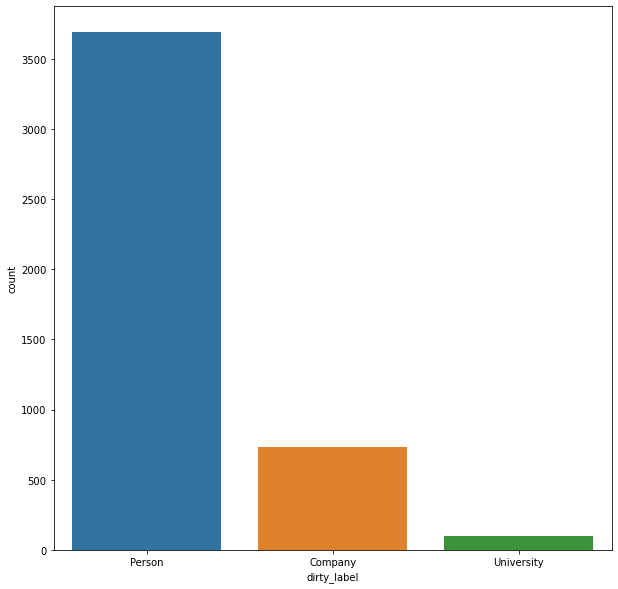

In [123]:
# A peak into the distribution of classes

fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(x="dirty_label", data=data, ax=ax)
plt.show()

#### Let's look if the data has any null values

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dirty_name   4520 non-null   object
 1   dirty_label  4520 non-null   object
dtypes: object(2)
memory usage: 70.8+ KB


#### *Looks like there is no null values.*

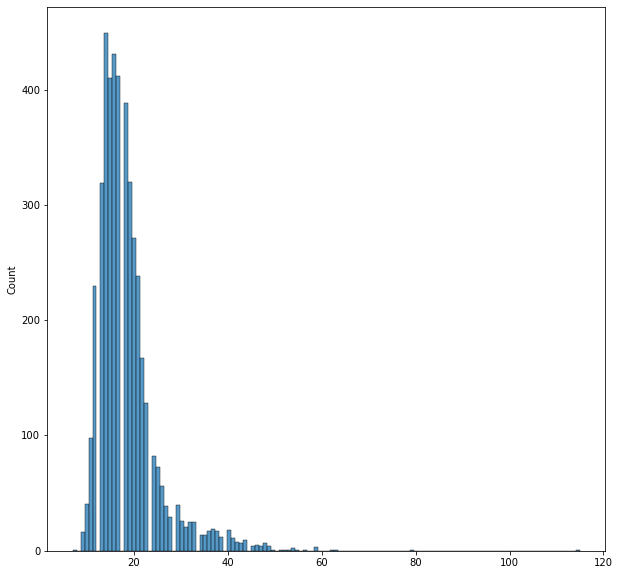

In [125]:
avg_seq_len = []
for i in range(len(data)):
    avg_seq_len.append(dp.char_count(text=data['dirty_name'].loc[i]))

fig,ax = plt.subplots(figsize=(10,10))
sns.histplot(data = avg_seq_len,ax=ax)
plt.show()

#### *We can see the average length of a name of any category is around 20.*

#### *We are going to work with a skewed data.*

In [126]:
# Cleaning the code

tokenized_data = dp.tokenizing(data)

Tokenized names:
0             [wright, pentlow]
1          [ms, sydney, hadebe]
2    [prof, ., hennie, vorster]
3              [enrica, hayter]
4               [teboho, ngema]
Name: Tidy_name, dtype: object


#### *We are going to let the labels stay the same as they seem right to work on.*

#### *We are also going to look at the unique token lengths.*

In [127]:
token_counts = dp.Count_tokens(tokenized_data) # Counting token lengths

In [128]:
print("Total unique tokens :", len(token_counts))
print('\n'.join(map(str, token_counts.most_common(n=5))))
print('...')
print('\n'.join(map(str, token_counts.most_common()[-3:])))

Total unique tokens : 4991
('.', 1087)
('dr', 346)
('miss', 275)
('mr', 239)
('mrs', 225)
...
('josebury', 1)
('duff', 1)
('forre', 1)


#### *So far the data makes sense. We have skewed data towards 'Person' class and the most numbers of tokens are '.', 'dr' and 'miss' as '.' is used with any prefix and prefixes with Person name are on the top.*

In [129]:
punct = [',','.','!','-','_',"'",'"','!','/','(',')']
print("Number of punctuation mark occurance:")
for p in punct:
    print('%s : %d' % (p, token_counts[p]))

Number of punctuation mark occurance:
, : 4
. : 1087
! : 0
- : 17
_ : 0
' : 21
" : 0
! : 0
/ : 0
( : 36
) : 30


#### *We can observe that there are quite a few punctuation marks which are necessary in a name.*

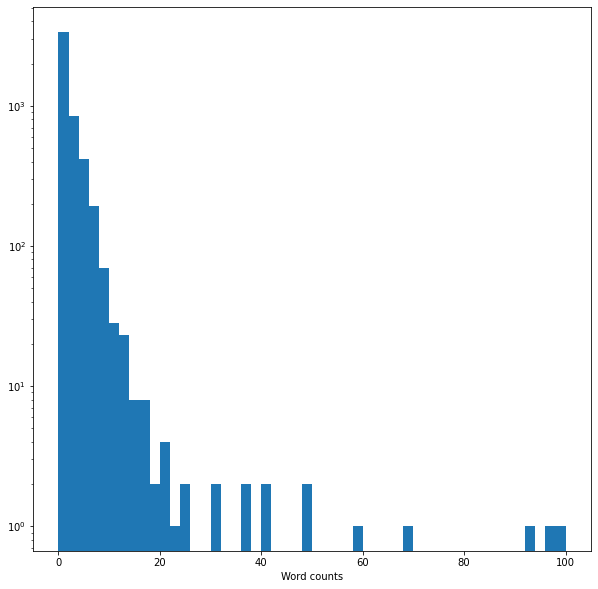

In [130]:
# A look into number of counts as histograms
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.hist(list(token_counts.values()), range=[0, 10**2], bins=50, log=True)
plt.xlabel("Word counts");

#### *After getting clean data we progress to extracting features to give to our model. We will be using tf-idf vectorizer over Bag-of-Words or Word2Vec. Bag of Words just creates a set of vectors containing the count of word occurrences, while the TF-IDF model contains information on the more important words and the less important ones as well. Word2Vec may get more information which could be more useful if we use a neural network which are better with more information.*

In [131]:
features = dp.tfidf_vectorizer(tokenized_data) # Extracting features through tf-idf vectorizer

### Splitting the dataset <a class="anchor" id="section_3_2"></a>

#### *We have the features and now we will split our dataset into training, validation and test sets.*

In [132]:
X_train, y_train, X_val, y_val, X_test, y_test = dp.data_split(features, tokenized_data['label'], TRAIN_RATIO, \
                                                               VAL_RATIO, TEST_RATIO) # Splitting data



Shapes after the split:

x_train shape =  (3163, 545)
y_train shape =  (3163,)

x_val shape =  (904, 545)
y_val shape =  (904,)

x_test shape =  (453, 545)
y_test shape =  (453,)




### Model Pipeline and Inference <a class="anchor" id="section_3_3"></a>

#### *Now we will define the model and give features. We choose a shallow machine leaning model over deep learning model because we do not have very large dataset. Even our sequence length of one sample is very small. So intuitively we choose a shallow machine learning model, which in turn gave us a very good result.*

#### *We choose Naive Bayes because of the reason that it is a generative model so intuitively we could say that it may work better, in our case where data is less, than a descriminative model, such as Random Forest. If we had more data we would go for a Neural Network, which is a descriminative model.*

In [133]:
NBmodel = model(X_train, y_train) # Defining model object
model = NBmodel.model_fit() # Fitting Multinomial Naive Bayes
predicted = NBmodel.model_predict(model,X_val) # Predicting on the validation

In [134]:
NBmodel.classification_report(y_val,predicted) # Getting classification report

Classification Report:
              precision    recall  f1-score   support

     Company       0.91      0.52      0.66       159
      Person       0.90      0.99      0.94       729
  University       0.93      0.81      0.87        16

    accuracy                           0.90       904
   macro avg       0.91      0.77      0.82       904
weighted avg       0.90      0.90      0.89       904



#### *We can notice how well the Multinomial Naive Bayes is working. This is a base Naive Bayes with Tf-idf tuned to such extent that would predict the smallest class. A suitable improvement would be to test other algorithms such as Support Vector Machine and Random Forrest.* 

Confusion Matrix:
The order of classes is as follows:
['Company' 'Person' 'University']


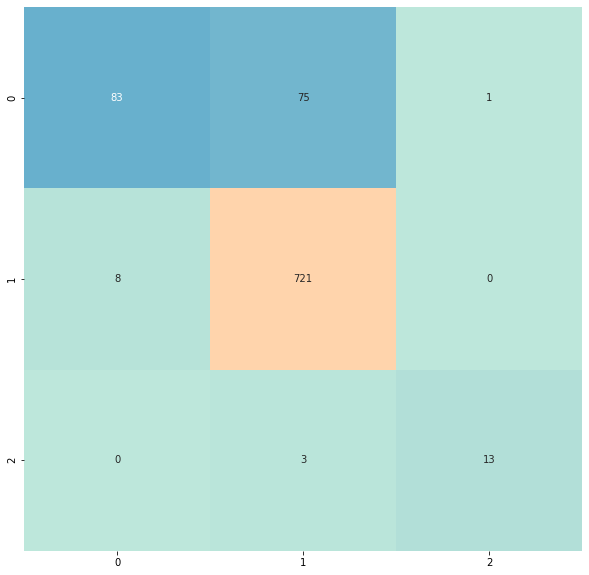

In [135]:
NBmodel.confusion_matrix(y_val,predicted)

#### *Confusion matrix explain that the more the data the better it will perform. Person class will have more veriety of words which explains why the other classes are misclassifying as a person.*


In [136]:
# Prediction on test set:

pred_test = NBmodel.model_predict(model,X_test)
NBmodel.classification_report(y_test,pred_test)

Classification Report:
              precision    recall  f1-score   support

     Company       0.97      0.44      0.61        77
      Person       0.90      1.00      0.94       372
  University       1.00      1.00      1.00         4

    accuracy                           0.90       453
   macro avg       0.96      0.81      0.85       453
weighted avg       0.91      0.90      0.89       453



Confusion Matrix:
The order of classes is as follows:
['Company' 'Person' 'University']


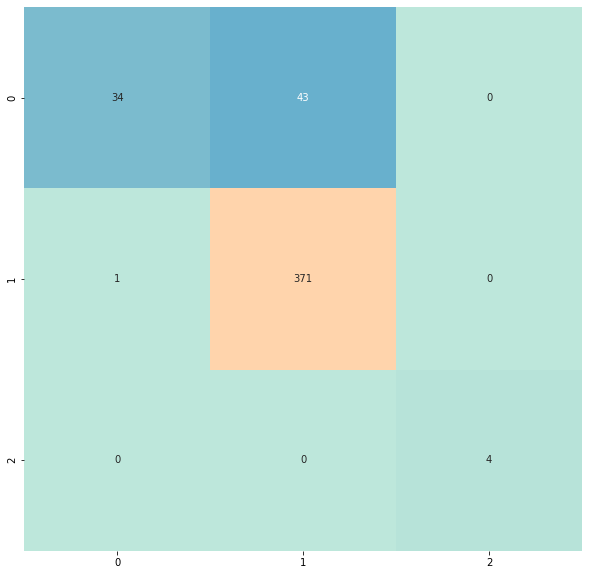

In [137]:
NBmodel.confusion_matrix(y_test,pred_test)

#### *A better score than validation? This is probably due to the face that both sets are from same distribution and gone through same preprocessing steps. An improvement would be to gather an unlabelled data to test our model.*

# --------------------------------------------------------------

## End Notes <a class="anchor" id="chapter4"></a>

### Suggested Improvements<a class="anchor" id="section_4_1"></a>

#### 1. *Collection of more data will help build a better model. Specially Collecting the data for the classes having less sample.*
#### 2. *Using Word2Vec or FastText for feature extraction.*
#### 3. *Using pre-trained Neural Netrworks would help.*
#### 4. *Prediction on unlabbelled data will provide more confidence on the model.*

### Deploying Model<a class="anchor" id="section_4_2"></a>

#### *We will use Amazon SageMaker to Deploy our model. Steps required would be:*

#### 1. *Creating an AmazonSageMaker notebook instance then selecting the jupyter notebook.*
#### 2. *Preporcessing the data, using a bucket to store the data and then training the model.*
#### 3. *Deploying and evaluating the model.*

### Summary Of Our Implementation <a class="anchor" id="section_4_3"></a>

#### *We have implemented A Name Classifier using Naive Bayes. We have created two classes to use data processing and the model in a neat way. Data preprocessing is done by lower casing and tokenizing the "dirty_name" column and creating a "Tidy_name column for the cleaned data. To visualize, we counted our tokens to know the length of each token. We didnot exclude the stopwords as it seemed to be a distinction between the class with lowest samples, i.e, "University". Once we had the clean data we extracted features using "Tf-idf" vectorizer. Once We have the features we split our dataset into training, validation and test set by 0.7,0.2 and 0.1 percentage respectively. Then we give the deatures to our Multinomial Naive Bayes. Which then predicts on the test set.*

# ----------------------------------END OF THE NOTEBOOK-------------------------------------